In [47]:
import os
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [2]:
route="data/pageview"

In [16]:
def get_dfs(road):
    '''
    get all filles with csvs in it
    '''
    result={}
   
    for filename in os.listdir(road):
        if filename.endswith('.csv'):
            fileroute=os.path.join(road,filename)
            filer=filename[:-13]
            result[filer]=pd.read_csv(fileroute)
            
    return result

In [17]:
router=get_dfs(route)

In [20]:
def get_top_10_average_daily_view(dic, output):
    top10={}
    top10['article']=[]
    top10['average_view']=[]
    for i in dic.keys():
        top10['article'].append(i)
        top10['average_view'].append(dic[i]['pageview'].mean())
    top10er=pd.DataFrame(top10)
    top10er=top10er.sort_values(by=['average_view'], ascending=False)
    top10er=top10er.head(10)
    if not os.path.exists(output):
        os.makedirs(output)
    outfile=os.path.join(output, 'top10average_pageview.csv')
    top10er.to_csv(outfile, index=False)
    return top10er
        

In [21]:
top10er=get_top_10_average_daily_view(router, 'data/eda')

In [22]:
counter=0
for i in top10er['article'].values:
    counter+=1
    if counter==1:
        der=router[i]

<AxesSubplot:xlabel='timestamp'>

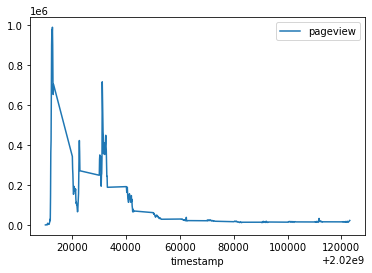

In [25]:
der.plot(x='timestamp', y='pageview')

In [46]:
timer=der['timestamp'].values
retime=[]
dater=[]
for i in timer:
    i=str(i)
    retime.append(i)
for j in retime:
    dater.append(date(int(j[:4]), int(j[4:6]),int(j[6:8])))
    

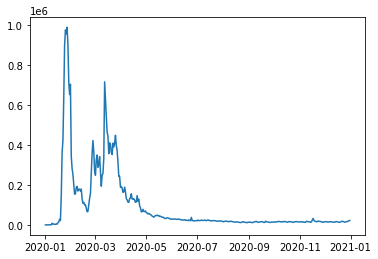

In [48]:
plt.plot(dater, der['pageview'].values)

In [57]:
def plot_top10(dict1,dict2, outpath):
    for i in dict1['article']:
        df=dict2[i]
        timer=df['timestamp'].values
        retime=[]
        dater=[]
        for m in timer:
            m=str(m)
            retime.append(m)
        for j in retime:
            dater.append(date(int(j[:4]), int(j[4:6]),int(j[6:8])))
        outer=i+'_pageview.png'
        putpath=os.path.join(outpath, outer)
        plt.figure()
        plt.plot(dater, df['pageview'].values)
        plt.xlabel('date')
        plt.ylabel('daily_pageview')
        plt.savefig(putpath)
        plt.close()
    return
        
        
        
    

In [58]:
plot_top10(top10er, router, 'data/eda')